## Twitter Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
import string
import re
import spacy
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator


from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

%matplotlib inline
pd.set_option('display.max_colwidth', 100)
import nltk
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('smalldataset.zip', compression='zip', header=0, sep=',')

In [3]:
nlp = spacy.load('en')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
stopword = nltk.corpus.stopwords.words('english')
tf.keras.backend.clear_session()

In [4]:
df.sample(10)

,Tweet,sentiment
865,But I think you'll do better than me happy,3
2123,but customs mean we can't send food abroad unhappy We do hope your other Birthday dreams come ...,0
301,soon :' I need you so much crying with joy {} I need you kaswa :',3
1303,imagine if he wins next time too unhappy unhappy,0
1534,this is damn.... theres people who sincerely want to attend BH birthday party but bcs of those p...,0
9,C'mon Tweeps,3
2467,Bihar sets Rs25lakh fee for who skip after subsidised education.,1
3201,Did police jump the gun in claiming hand in train blast?,1
1393,my hair is not as crisp unhappy,0
1525,I'm slow unhappy,0


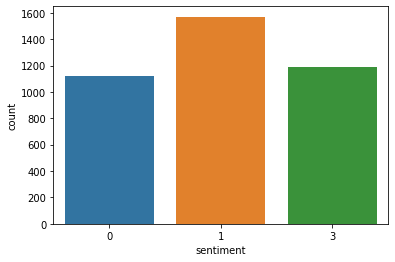

In [5]:
sns.countplot(df['sentiment'])

In [6]:
df['sentiment']= df['sentiment'].apply(lambda x : 2 if x == 3 else x )

In [8]:
df.sample(10)

,Tweet,sentiment
2945,Yogi vows to work for all.,1
3409,savours civic win and Congress loss.,1
3736,dog and drinks -- stood out in PM reply in Parliament.,1
395,Happy birthday,2
3474,Dr Kunal Sarkar on how cartels have been ripping off patients in,1
1795,Wth why did 4/20 have to happen during the Easter holidays it's one of the best days in Leeds un...,0
2560,as she opts for over,1
1713,follow mee plss unhappy,0
2256,shouldn't keep Kenyans complaining on,0
3688,State Bank of India Q3 profit more than doubles to Rs 2,1


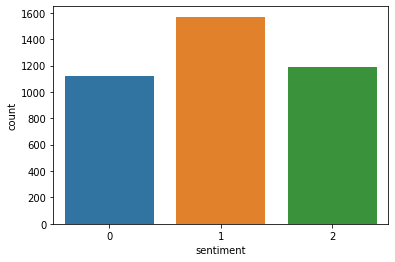

In [7]:
sns.countplot(df['sentiment'])

In [9]:
all_tweets = " ".join(str(review) for review in df['Tweet'])
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_tweets)

(-0.5, 399.5, 199.5, -0.5)

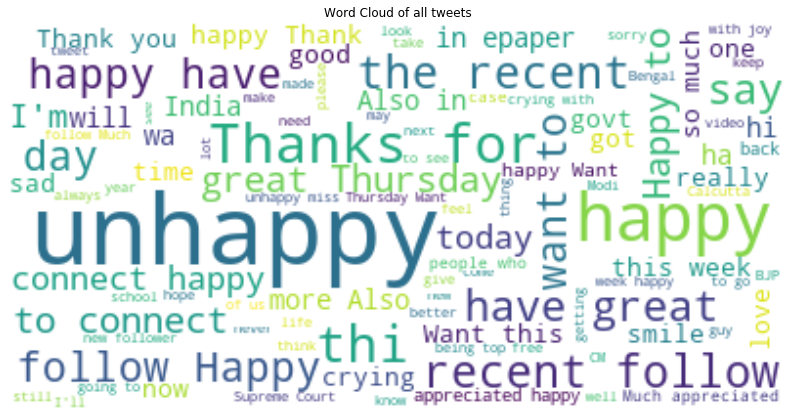

In [10]:
plt.figure(figsize=(14,14))
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.title('Word Cloud of all tweets')
plt.axis('off')

In [11]:
def clean_data(data):
    """
     Removes punctuation and return lower case string.
    """
    global ps
    global wn
    global np
    global stopword

    if not isinstance(data, str):
        return ""
    no_punctuation = str(nlp(data).text)
    no_numbers = re.sub('[0-9]+', '', no_punctuation)
    tokenize = re.split('\W+', no_numbers)
    no_stopwords = [str.lower(word) for word in tokenize if word not in stopword]
    stemming = [ps.stem(word) for word in no_stopwords]
    lemmatize = [wn.lemmatize(str(word)) for word in stemming]
    return " ".join(lemmatize)

In [12]:
df['clean_tweet'] = df['Tweet'].apply(lambda x: clean_data(x))
df.head()

,Tweet,sentiment,clean_tweet
0,An inspiration in all aspects: Fashion,2,an inspir aspect fashion
1,fitness,2,fit
2,beauty and personality. :)KISSES TheFashionIcon,2,beauti person kiss thefashionicon
3,Apka Apna Awam Ka Channel Frankline Tv Aam Admi Production Please Visit Or Likes Share :)Fb Pag...,2,apka apna awam ka channel franklin tv aam admi product plea visit or like share fb page
4,Beautiful album from the greatest unsung guitar genius of our time - and I've met the great bac...,2,beauti album greatest unsung guitar geniu time i met great backstag


In [18]:
print(df.clean_tweet[0])

an inspir aspect fashion


In [19]:
def get_general_wordset():
    wordsList = np.load('glove_twitter/wordsList.npy')
    print('Loaded the word list!')
    wordsList = wordsList.tolist() #Originally loaded as numpy array
    wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
    wordVectors = np.load('glove_twitter/wordVectors.npy')
    print ('Loaded the word vectors!')
    return wordsList, wordVectors

In [20]:
wordsList,wordVectors = get_general_wordset()

Loaded the word list!
Loaded the word vectors!


In [21]:
type(wordVectors), wordVectors.shape

(numpy.ndarray, (400000, 50))

In [22]:
print(wordVectors[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [23]:
def get_twitter_glove():
    wordsList=[]
    wordVectors=[]
    with open('glove_twitter/glove.6B.50d.txt') as fp:
        for line in fp:
            values = line.split()
            wordsList.append(values[0])
            wordVectors.append(np.asarray(values[1:], dtype='float32'))
    return wordsList, wordVectors

In [24]:
wordsList,wordVectors = get_twitter_glove()

In [25]:
type(wordVectors), len(wordVectors)

(list, 400000)

In [26]:
print(wordVectors[0])

[ 4.1800e-01  2.4968e-01 -4.1242e-01  1.2170e-01  3.4527e-01 -4.4457e-02
 -4.9688e-01 -1.7862e-01 -6.6023e-04 -6.5660e-01  2.7843e-01 -1.4767e-01
 -5.5677e-01  1.4658e-01 -9.5095e-03  1.1658e-02  1.0204e-01 -1.2792e-01
 -8.4430e-01 -1.2181e-01 -1.6801e-02 -3.3279e-01 -1.5520e-01 -2.3131e-01
 -1.9181e-01 -1.8823e+00 -7.6746e-01  9.9051e-02 -4.2125e-01 -1.9526e-01
  4.0071e+00 -1.8594e-01 -5.2287e-01 -3.1681e-01  5.9213e-04  7.4449e-03
  1.7778e-01 -1.5897e-01  1.2041e-02 -5.4223e-02 -2.9871e-01 -1.5749e-01
 -3.4758e-01 -4.5637e-02 -4.4251e-01  1.8785e-01  2.7849e-03 -1.8411e-01
 -1.1514e-01 -7.8581e-01]


In [28]:
wordVectors=np.array(wordVectors)
type(wordVectors), wordVectors.shape

(numpy.ndarray, (400000, 50))

In [29]:
lstmUnits = 64
numClasses = 3
max_tweet_length = 10
num_epochs = 10
vocab_size = len(wordsList)
embedding_dim = wordVectors.shape[1]
print("Max_tweet_length: {0}, Vocabulary Size: {1}, Embedding Dimensions: {2}"\
      .format(max_tweet_length, vocab_size, embedding_dim))

Max_tweet_length: 10, Vocabulary Size: 400000, Embedding Dimensions: 50


In [30]:
df.head()

,Tweet,sentiment,clean_tweet
0,An inspiration in all aspects: Fashion,2,an inspir aspect fashion
1,fitness,2,fit
2,beauty and personality. :)KISSES TheFashionIcon,2,beauti person kiss thefashionicon
3,Apka Apna Awam Ka Channel Frankline Tv Aam Admi Production Please Visit Or Likes Share :)Fb Pag...,2,apka apna awam ka channel franklin tv aam admi product plea visit or like share fb page
4,Beautiful album from the greatest unsung guitar genius of our time - and I've met the great bac...,2,beauti album greatest unsung guitar geniu time i met great backstag


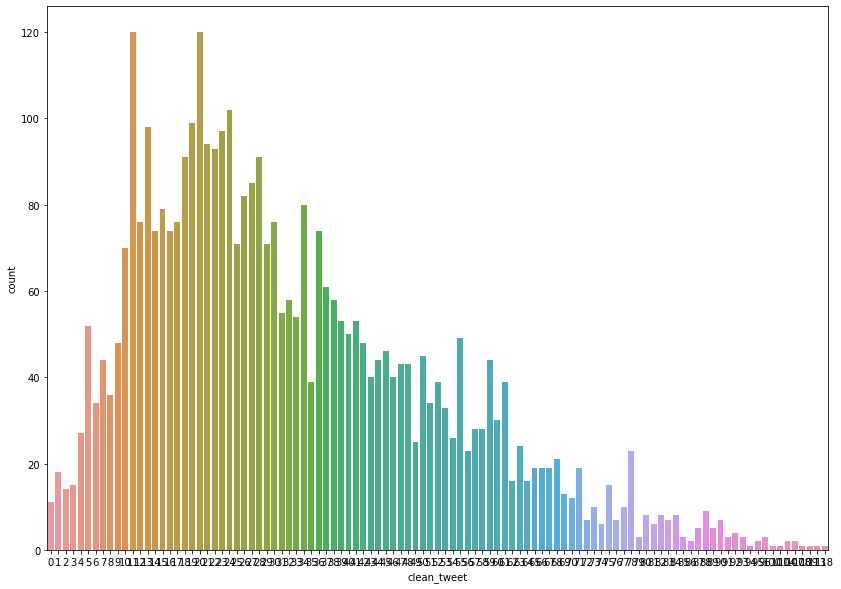

In [35]:
plt.figure(figsize=(14,10))
sns.countplot(df['clean_tweet'].apply(lambda x : len(x)))

In [36]:
def vectorize(tweet):
    global max_tweet_length
    global wordsList
    
    tweetid =[0] * max_tweet_length
    indexCounter = 0
    for word in tweet.split(" "):
        if indexCounter < max_tweet_length:
            try:
                tweetid[indexCounter] = wordsList.index(word)
            except ValueError:
                tweetid[indexCounter] = 399999 #Vector for unknown words
        indexCounter = indexCounter + 1
        
    return tweetid

In [38]:
df['tweet_ids']=df['clean_tweet'].apply(lambda x: vectorize(x))

In [40]:
df.sample(5)

,Tweet,sentiment,clean_tweet,tweet_ids
2826,made to trek 2km to fetch water for,1,made trek km fetch water,"[399999, 116, 9779, 1608, 18184, 430, 399999, 0, 0, 0]"
997,Hellooo happy Jackatkinson (jackat13),2,hellooo happi jackatkinson jackat,"[399999, 366139, 399999, 399999, 399999, 0, 0, 0, 0, 0]"
2987,How Rahul met HC gives to CBI,1,how rahul met hc give cbi,"[197, 20675, 809, 27811, 455, 25782, 0, 0, 0, 0]"
1272,crying muh feels,0,cri muh feel,"[62558, 13626, 998, 0, 0, 0, 0, 0, 0, 0]"
2745,Militant wing welcomes but asks him not to speak against,1,milit wing welcom ask speak,"[399999, 1755, 389376, 1712, 2199, 399999, 0, 0, 0, 0]"


In [41]:
vectorize("an inspire aspect fashion ")

[29, 11356, 6395, 2535, 399999, 0, 0, 0, 0, 0]

In [42]:
def count_unknown_words(tweet):
    count = 0
    for i in tweet:
        if i == 399999:
            count+=1
    return count

In [43]:
vectorize("this is test for ")

[37, 14, 728, 10, 399999, 0, 0, 0, 0, 0]

In [44]:
df['tweet_ids']=df['clean_tweet'].apply(lambda x: vectorize(x))

In [45]:
df['count'] = df['tweet_ids'].apply(lambda x: count_unknown_words(x))
df['len'] = df['clean_tweet'].apply(lambda x: len(x.split(" ")))
df['unknown_perct'] =   ((df['count'] / df['len'])*100).astype(int)

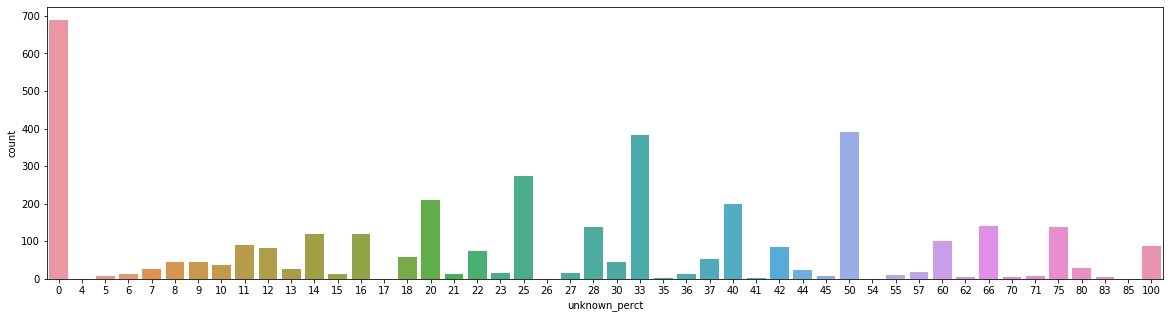

In [46]:
plt.figure(figsize=(20,5))
sns.countplot(df['unknown_perct'])

In [47]:
df[df.unknown_perct < 10].head(100)

,Tweet,sentiment,clean_tweet,tweet_ids,count,len,unknown_perct
3,Apka Apna Awam Ka Channel Frankline Tv Aam Admi Production Please Visit Or Likes Share :)Fb Pag...,2,apka apna awam ka channel franklin tv aam admi product plea visit or like share fb page,"[399999, 144642, 248060, 14658, 1629, 5032, 816, 72441, 398278, 1459]",1,18,5
6,Omg he... kissed... him crying with joy,2,omg kiss cri joy,"[78550, 7856, 62558, 5973, 0, 0, 0, 0, 0, 0]",0,4,0
8,thanks happy,2,thank happi,"[5551, 366139, 0, 0, 0, 0, 0, 0, 0, 0]",0,2,0
11,Thanks for the great review! smile,2,thank great review smile,"[5551, 353, 1287, 6107, 0, 0, 0, 0, 0, 0]",0,4,0
18,Go back to school for music! I think I will in time happy,2,go back school music i think i time happi,"[242, 137, 164, 403, 41, 269, 41, 79, 366139, 0]",0,9,0
...,...,...,...,...,...,...,...
282,Noted on this Sir,2,note sir,"[1812, 2699, 0, 0, 0, 0, 0, 0, 0, 0]",0,2,0
283,The bus from Bangsar heading to Awan Besar. Have a Good Day happy,2,the bu bangsar head awan besar have good day happi,"[399999, 0, 20530, 114152, 362, 65283, 43581, 33, 219, 122]",1,11,9
284,Thanks for the recent follow Happy to connect happy have a great Thursday. Want this,2,thank recent follow happi connect happi great thursday want,"[5551, 397, 1816, 366139, 6481, 366139, 353, 184, 303, 0]",0,9,0
286,lets agree she put her brain on knees crying with joy,2,let agre put brain knee cri joy,"[886, 127936, 339, 2955, 3457, 62558, 5973, 0, 0, 0]",0,7,0


In [54]:
features = df['tweet_ids']
label = df['sentiment']

In [55]:
df.Tweet[0]

'An inspiration in all aspects: Fashion'

In [56]:
input=[]
for f in features:
    input.append(list(f))

In [57]:
features=np.array(input)
target=df['sentiment']

In [58]:
lstmUnits = 64
numClasses = 3
max_tweet_length = 10
num_epochs = 100
vocab_size = len(wordsList)
embedding_dim = wordVectors.shape[1]
print("Max_tweet_length: {0}, Vocabulary Size: {1}, Embedding Dimensions: {2}"\
      .format(max_tweet_length, vocab_size, embedding_dim))

Max_tweet_length: 10, Vocabulary Size: 400000, Embedding Dimensions: 50


In [59]:
X_train, X_test, y_train, y_test = train_test_split(features,target,random_state=42, test_size=0.3)
train_x = np.asarray(X_train)
train_y = np.asarray(y_train)
test_x = np.asarray(X_test)
test_y = np.asarray(y_test)

In [60]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim,weights=[wordVectors], \
                                    input_length=max_tweet_length, trainable=False))
model.add(tf.keras.layers.LSTM(embedding_dim))
tf.keras.layers.Dense(embedding_dim, activation='relu'),
model.add(tf.keras.layers.Dense(numClasses, activation='softmax'))

# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 50)            20000000  
_________________________________________________________________
lstm (LSTM)                  (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 153       
Total params: 20,020,353
Trainable params: 20,353
Non-trainable params: 20,000,000
_________________________________________________________________
None


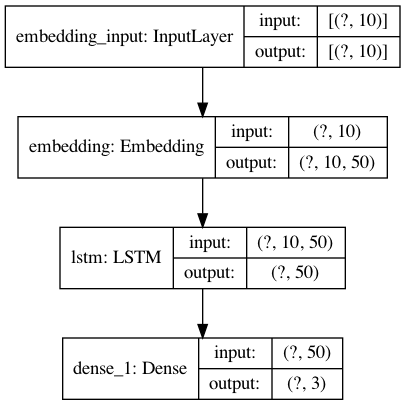

In [61]:
keras.utils.plot_model(model,'model.png', show_shapes=True, show_layer_names=True)

In [62]:
training_hist = model.fit(train_x, train_y, epochs=num_epochs, validation_split=0.2, verbose=True)

Train on 2168 samples, validate on 543 samples
Epoch 1/100
2168/2168 [==============================] - 11s 5ms/sample - loss: 0.9428 - accuracy: 0.5627 - val_loss: 0.6822 - val_accuracy: 0.7330
Epoch 2/100
2168/2168 [==============================] - 5s 2ms/sample - loss: 0.5978 - accuracy: 0.7574 - val_loss: 0.5414 - val_accuracy: 0.7735
Epoch 3/100
2168/2168 [==============================] - 5s 2ms/sample - loss: 0.5164 - accuracy: 0.7851 - val_loss: 0.4893 - val_accuracy: 0.7956
Epoch 4/100
2168/2168 [==============================] - 5s 2ms/sample - loss: 0.4733 - accuracy: 0.8054 - val_loss: 0.4535 - val_accuracy: 0.8140
Epoch 5/100
2168/2168 [==============================] - 5s 2ms/sample - loss: 0.4427 - accuracy: 0.8206 - val_loss: 0.4531 - val_accuracy: 0.8177
Epoch 6/100
2168/2168 [==============================] - 5s 2ms/sample - loss: 0.4186 - accuracy: 0.8270 - val_loss: 0.4270 - val_accuracy: 0.8214
Epoch 7/100
2168/2168 [==============================] - 5s 2ms/sample

2168/2168 [==============================] - 3s 2ms/sample - loss: 0.0424 - accuracy: 0.9815 - val_loss: 0.8188 - val_accuracy: 0.8269
Epoch 57/100
2168/2168 [==============================] - 3s 2ms/sample - loss: 0.0277 - accuracy: 0.9862 - val_loss: 0.8709 - val_accuracy: 0.8195
Epoch 58/100
2168/2168 [==============================] - 3s 1ms/sample - loss: 0.0305 - accuracy: 0.9871 - val_loss: 0.8770 - val_accuracy: 0.8158
Epoch 59/100
2168/2168 [==============================] - 3s 1ms/sample - loss: 0.0510 - accuracy: 0.9802 - val_loss: 0.8417 - val_accuracy: 0.8306
Epoch 60/100
2168/2168 [==============================] - 3s 1ms/sample - loss: 0.0412 - accuracy: 0.9829 - val_loss: 0.8523 - val_accuracy: 0.8343
Epoch 61/100
2168/2168 [==============================] - 3s 1ms/sample - loss: 0.0249 - accuracy: 0.9871 - val_loss: 0.8679 - val_accuracy: 0.8398
Epoch 62/100
2168/2168 [==============================] - 4s 2ms/sample - loss: 0.0243 - accuracy: 0.9894 - val_loss: 0.9002 

In [63]:
loss, accuracy = model.evaluate(train_x, train_y, verbose=0)

In [64]:
print(loss, accuracy)

0.2556517022242409 0.9365548


In [65]:
training_hist_df = pd.DataFrame(training_hist.history)
training_hist_df['epoch'] = training_hist.epoch
training_hist_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.019975,0.988469,1.077181,0.847145,95
96,0.019150,0.987546,1.116785,0.845304,96
97,0.019848,0.989852,1.247327,0.804788,97
98,0.039161,0.983395,1.241796,0.799263,98
99,0.070167,0.970480,1.002536,0.799263,99


In [67]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

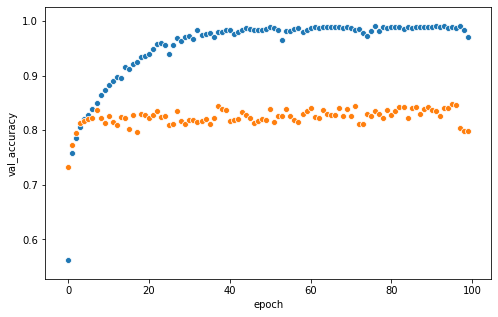

In [70]:
plt.figure(figsize=(8,5))
sns.scatterplot(training_hist_df.epoch, training_hist_df.accuracy)
sns.scatterplot(training_hist_df.epoch, training_hist_df.val_accuracy)

In [ ]:
#plt.figure(figsize=(10,8))
#plotter.plot({'Basic':training_hist}, metric='accuracy')
#plt.ylabel('MS $E[Charges]')
#plt.show()

In [ ]:
ypredict = model.predict(test_x).astype(int)

In [ ]:
print(ypredict)

In [ ]:
ypredict = ypredict.flatten()

In [ ]:
msg = "moviee is very very bad, worst ever"

In [ ]:
msg = "movie is very very good, best ever"

In [ ]:
msg = clean_data(msg)

In [ ]:
print(msg)

In [ ]:
msg = vectorize(msg)
msg = np.asarray(msg)

In [ ]:
print(msg)

In [ ]:
msg = msg.reshape(1,10)

In [ ]:
msg.shape

In [ ]:
model.predict(msg)

In [ ]:
model.predict(msg)

In [ ]:
model.save('./model_all_save')

In [ ]:
!ls

In [ ]:
loaded_model = tf.keras.models.load_model('./model_all_save')

In [ ]:
print(loaded_model.summary())

In [ ]:
keras.utils.plot_model(loaded_model,'model.png', show_shapes=True, show_layer_names=True)

In [ ]:
msg = "moviee is very very bad, worst ever"

In [ ]:
msg = clean_data(msg)

In [ ]:
msg = vectorize(msg)
msg = np.asarray(msg)
msg = msg.reshape(1,10)

In [ ]:
msg = msg.reshape(1,10)

In [ ]:
msg

In [ ]:
loaded_model.predict(msg)

In [ ]:
import pprint
import json

In [ ]:
ourjson = model.to_json()

In [ ]:
pprint.pprint(json.loads(ourjson))

In [ ]:
with open('./model.json','w') as fp:
    fp.write(ourjson)

In [ ]:
!ls *.json

In [ ]:
with open('./model.json') as fp:
    model_json = json.load(fp)

In [ ]:
model_recreated = tf.keras.models.model_from_json(json.dumps(model_json))
model_recreated.summary()

In [ ]:
x=model.predict(msg)

In [ ]:
y=x.tolist()
print(y)

In [ ]:
print(type(y))

In [ ]:
y[0].index(max(y[0]))

In [ ]:
y[0].index(min(y[0]))